# Projeto1 Ciência dos Dados 2018.2

# Pergunta: Qual a associação que a idade do primeiro casamento feminino e a porcentagem da população urbana possuem com o IDH de um país?

In [5]:
#imports

%matplotlib inline
import pandas as pd
import numpy as np
import math as math
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#Leitura dos arquivos em Excel

idh = pd.read_excel('hdi_human_development_index.xlsx')
urbano = pd.read_excel('indicator wdi urbanpopulation.xlsx')
idade_casamento = pd.read_excel('age_at_1st_marriage_women.xlsx')

In [7]:
#Selecionando o ano de 2005 para pesquisa

idh_2005 = idh.loc[:, ["geo", 2005]]
urbano_2005 = urbano.loc[:, ["Urban population (% of total)", '2005']]
idade_casamento_2005 = idade_casamento.loc[:, ["geo", 2005]]

In [8]:
#Mudando os indices

idh_idx = idh_2005.set_index('geo')
urbano_idx = urbano_2005.set_index('Urban population (% of total)')
idade_casamento_idx = idade_casamento_2005.set_index('geo')

In [9]:
#Juntando as tabelas

idhs = idh_idx.join(idade_casamento_idx, how='inner', lsuffix='_idh', rsuffix='_idade_casamento')
data = idhs.join(urbano_idx, how='inner', rsuffix='_inflacao')

data.columns = ['2005_idh','2005_idade_casamento', '2005_pop_urbana(%)']
data = data.dropna()

In [80]:
#visualizando a tabela
data.head(3)

,2005_idh,2005_idade_casamento,2005_pop_urbana(%)
Afghanistan,0.405,17.8,21.882
Albania,0.696,23.3,46.804
Algeria,0.686,29.6,66.689


# Análise das variáveis

**1) Idade do primeiro casamento feminino (2005)**

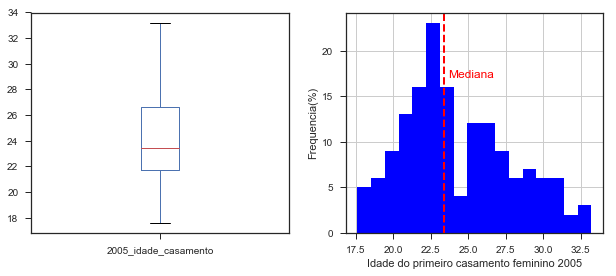

count    155.000000
mean      24.241290
std        3.624964
min       17.600000
25%       21.700000
50%       23.400000
75%       26.650000
max       33.200000
Name: 2005_idade_casamento, dtype: float64


In [81]:
fig = plt.figure(figsize=(13, 4))

plt.subplot(131)
data["2005_idade_casamento"].plot.box()

plt.subplot(132)
hic  = data["2005_idade_casamento"].hist(bins=17, color = 'blue')
plt.xlabel('Idade do primeiro casamento feminino 2005')
plt.ylabel('Frequencia(%)')


verticalLine(hic, data['2005_idade_casamento'].median(), 17, "r", "Mediana")

plt.tight_layout()
plt.show()

print(data["2005_idade_casamento"].describe())

Analisando os dados da variável "Idade do primeiro casamento feminino" pode-se concluir que há uma distribuição levemente assimétrica à direita, visto que há uma concentração maior de dados nos valores mais baixos e a cauda mais longa da distribuição fica à direita, indicando a ocorrência de valores altos com menor frequência, o que influencia o deslocamento da média em sua direção. Esses dados apresentam uma alta variabilidade, uma vez que as observações estão mais distantes da medida de tendência central e, portanto, possuem um alto desvio padrão(3.6 anos). De acordo com o Boxplot apresentado, o intervalo interquartil(IQ = Q3 - Q1) está entre 21.7 e 26.6 anos, ou seja, metade dos dados estão nesse intervalo de idades. A medida de tendência central(mediana) é representada pelo 2º quartil e equivale a 23.4 anos. Por fim, não são apresentados Outliers, pois não há valores considerados como possíveis extremos.


**2) IDH(2005)**

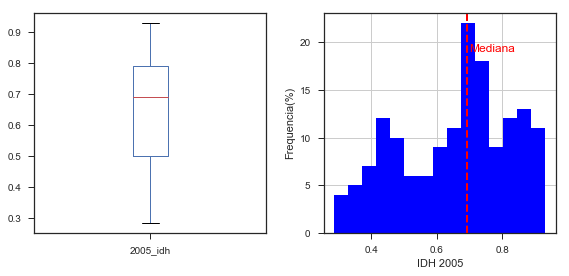

count    155.000000
mean       0.655619
std        0.169062
min        0.286000
25%        0.501500
50%        0.692000
75%        0.790500
max        0.931000
Name: 2005_idh, dtype: float64


In [85]:
fig = plt.figure(figsize=(12, 4))

plt.subplot(131)
data["2005_idh"].plot.box()

plt.subplot(132)
hidh = data["2005_idh"].hist(bins=15, color='blue')
plt.xlabel('IDH 2005')
plt.ylabel('Frequencia(%)')

verticalLine(hidh, data['2005_idh'].median(), 19, "r", "Mediana")

plt.tight_layout()
plt.show()

print(data["2005_idh"].describe())

Analisando os dados da variável "IDH" pode-se concluir que há uma distribuição assimétrica à esquerda, visto que há uma concentração maior de dados nos valores mais altos e a cauda mais longa da distribuição fica à esquerda, indicando a ocorrência de valores baixos com menor frequência, o que influencia o deslocamento da média para baixo. Esses dados apresentam uma alta variabilidade, uma vez que as observações estão mais distantes da medida de tendência central e, portanto, possuem um desvio padrão elevado(0.16). De acordo com o Boxplot apresentado, o intervalo interquartil(IQ = Q3 - Q1) está entre o IDH de 0.50 a 0.79, ou seja, metade dos dados se encontram nesse intervalo, o que corrobora a distribuição assimétrica. A medida de tendência central(mediana) é representada pelo 2º quartil e equivale ao IDH de 0.69. Por fim, não são apresentados Outliers, pois não há valores considerados como possíveis extremos.

**3) Porcentagem de população urbana(2005)**

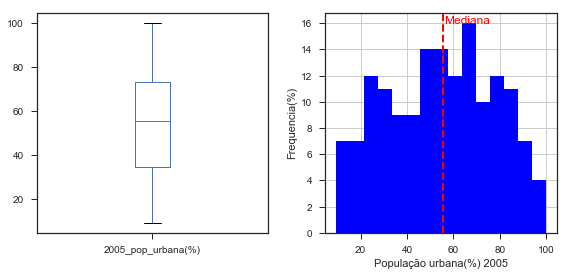

count    155.000000
mean      54.173910
std       23.578614
min        9.375000
25%       34.762000
50%       55.563000
75%       73.142500
max      100.000000
Name: 2005_pop_urbana(%), dtype: float64


In [118]:
fig = plt.figure(figsize=(12, 4))
plt.subplot(131)
data["2005_pop_urbana(%)"].plot.box()

plt.subplot(132)
hpu = data["2005_pop_urbana(%)"].hist(bins=15, color='blue')
plt.xlabel('População urbana(%) 2005')
plt.ylabel('Frequencia(%)')

verticalLine(hpu, data['2005_pop_urbana(%)'].median(), 16, "r", "Mediana")

plt.tight_layout()
plt.show()

print(data["2005_pop_urbana(%)"].describe())

Analisando os dados da variável "Porcentagem de população urbana" pode-se concluir que há uma distribuição simétrica ao redor de 50%, visto que há uma concentração maior de dados nos valores intermediários e há uma distribuição semelhante dos dados tanto para a esquerda, quanto para a direita. Esses dados apresentam uma alta variabilidade, uma vez que as observações se apresentam mais distantes da medida de tendência central e, portanto, possuem um desvio padrão elevado(23.5%). De acordo com o Boxplot apresentado, o intervalo interquartil(IQ = Q3 - Q1) está entre 34% e 73%, ou seja, há uma maior massa de dados nesse intervalo, o que corrobora a distribuição simétrica. A medida de tendência central(mediana) é representada pelo 2º quartil e equivale a 55%. Por fim, não são apresentados Outliers, pois não há valores considerados como possíveis extremos.

# Análise bidimencional quantitativa

In [14]:
#Criando tabela de correlação

cor = data.corr()

**1.1) Verificando a associação da porcentagem de população urbana com o IDH para o ano de 2005**

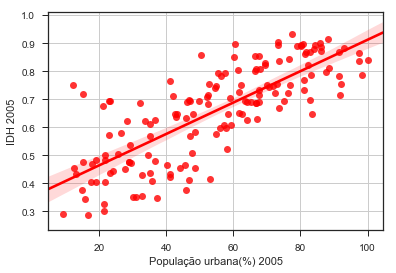

Correlação: 0.7810422760992678


Anomalias:
                     2005_idh  2005_idade_casamento  2005_pop_urbana(%)
Trinidad and Tobago     0.751                  26.8              12.122
Sri Lanka               0.718                  25.3              15.127
Barbados                0.766                  31.8              41.182
Slovenia                0.858                  30.3              50.469


In [153]:
sns.regplot(data['2005_pop_urbana(%)'], data['2005_idh'], color=('red'))
plt.xlabel('População urbana(%) 2005')
plt.ylabel('IDH 2005')
plt.grid()
plt.show()

print("Correlação: {}\n".format(cor['2005_pop_urbana(%)']['2005_idh']))

print('\nAnomalias:\n{}'.format(data[(data['2005_idh']>0.715) & (data['2005_pop_urbana(%)']<51)].sort_values(by='2005_pop_urbana(%)')))

De acordo com o gráfico apresentado, é possível notar uma boa associação entre a variável "Porcentagem da população urbana" com o IDH, uma vez que os pontos possuem um comportamento linear e não há uma grande dispersão dos pontos obtidos. Foi obtida, também, uma correlação alta (0.78). Dessa forma, há uma coerência de análise entre os dados fornecidos. Esta correlação é plausível, visto que quanto mais urbanizado for o país maior o número de indústrias e, consequentemente, maior o PIB per capta. Contudo, não é possível realizar esta afirmação, pois, de acordo com os dados fornecidos, há algumas anomalias, como por exemplo Trindade e Tobago, que possui baixa porcentagem de população urbana(12%) e IDH elevado(0.75). As demais anomalias podem ser visualizadas na tabela acima.

**1.2) Verificando o comportamento da análise ao longo dos anos**

Correlação 2007: 0.7141939373387071
Número de países anômalos 2007: 7

Correlação 2008: 0.7096501617530555
Número de países anômalos 2008: 10

Correlação 2009: 0.7053350960620842
Número de países anômalos 2009: 9

Correlação 2010: 0.7009963673313683
Número de países anômalos 2010: 11

Correlação 2011: 0.6970364604381591
Número de países anômalos 2011: 13



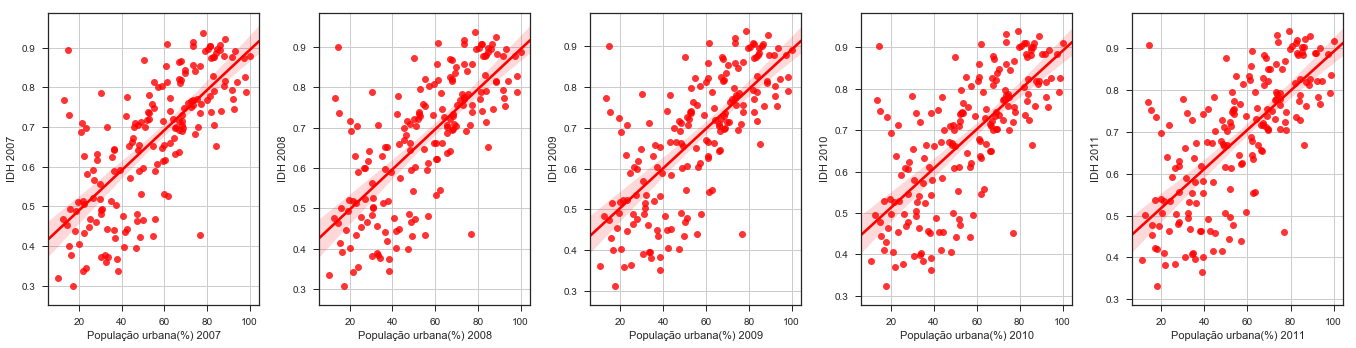

In [183]:
fig = plt.figure(figsize=(19, 5))
i=151
for ano in range(2007,2012,1):
    
    idh_ = idh.loc[:, ["geo", ano]]
    urb_ = urbano.loc[:, ["Urban population (% of total)", str(ano)]]

    idh_idx = idh_.set_index('geo')
    urb_idx = urb_.set_index('Urban population (% of total)')

    d2 = idh_idx.join(urb_idx, how='inner',lsuffix='idh', rsuffix='urb')
    d2.columns = ['idh', 'urb']
    
    c2 = d2.corr()

    plt.subplot(i)
    sns.regplot(d2['urb'], d2['idh'], color=('red'))
    plt.xlabel('População urbana(%) {}'.format(ano))
    plt.ylabel('IDH {}'.format(ano))
    plt.grid()
    print("Correlação {}: {}".format(ano, c2['urb']['idh']))
    print('Número de países anômalos {}: {}\n'.format(ano, len( d2[(d2['idh']>0.715) & (d2['urb']<51)])))
    #print('Anomalias {}:\n{}\n'.format(ano, d2[(d2['idh']>0.7) & (d2['urb']<55)].sort_values(by='urb').head(4)))
    i+=1
    
plt.tight_layout()
plt.show()

**2.1) Verificando a associação da idade do primeiro casamento feminino com o IDH para o ano de 2005**

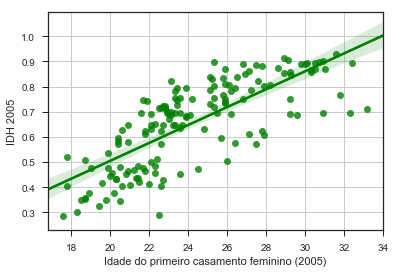

Correlação: 0.762764599014513



In [65]:
sns.regplot(data['2005_idade_casamento'], data['2005_idh'], color=('green'))
plt.xlabel('Idade do primeiro casamento feminino (2005)')
plt.ylabel('IDH 2005')
plt.grid()
plt.show()

print("Correlação: {}\n".format(cor['2005_idade_casamento']['2005_idh']))

De acordo com o gráfico apresentado, é possível notar uma boa associação entre a variável "Idade do primeiro casamento feminino" com o IDH, uma vez que os pontos apresentados não estão muito dispersos, possuindo um comportamento linear e com uma boa correlação (0.76). Dessa forma, há uma coerência de análise entre os dados fornecidos. Esta correlação é viável, visto que se as mulheres se casam com uma idade mais elevada elas possuem mais tempo para se dedicar a sua vida profissional e pessoal e assim, conseguem obter um melhor emprego, o que implica diretamente em um aumento do PIB per capta e consequentemente um aumento no IDH. 

**2.2) Verificando o comportamento da análise ao longo dos anos** 

Devido a falta de dados relacionados a variável "Idade do primeiro casamento feminino" não é possível realizar uma análise histórica desses dados.

**3.1) Verificando a associação das variáveis escolhidas para o ano de 2005**



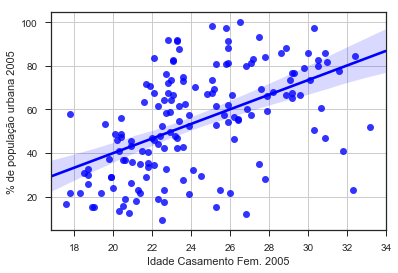

Correlação: 0.5146774530692737



In [63]:
sns.regplot(data['2005_idade_casamento'], data['2005_pop_urbana(%)'], color=('blue'))
plt.ylabel('% de população urbana 2005')
plt.xlabel('Idade Casamento Fem. 2005')
plt.grid()
plt.show()

print("Correlação: {}\n".format(cor['2005_pop_urbana(%)']['2005_idade_casamento']))

Observando o gráfico obtido, não é possível associar a idade do primeiro casamento feminino com a porcentagem de população urbana, uma vez que há uma enorme dispersão dos pontos no gráfico e eles não possuem uma tendência linear. Dessa forma, a correlação apresentada entre as variáveis é baixa(0.51). 

**3.2) Verificando o comportamento da análise ao longo dos anos**

Devido a falta de dados relacionados a variável "Idade do primeiro casamento feminino" não é possível realizar uma análise histórica desses dados.

# Conclusão

Após a análise conjunta de todas as variáveis é possível concluir que há uma associação entre a idade do primeiro casamento feminino e a porcentagem de população urbana com o IDH, mas apenas esta análise de dados não permite concluir que há uma causalidade entre essas variáveis, ou seja, o aumento de idade do primeiro casamento feminino e o aumento da porcentagem de população urbana não implicam, necessáriamente, em um aumento do IDH de um país...